In [26]:
import os
import json
from tqdm import tqdm

In [27]:
with open('../data/document/역도/save_dataset.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [31]:
len(data['merged_dataset'])

276

In [47]:
def count_numbers_in_intervals(numbers, unit):
    # 최대값을 구함
    max_val = max(numbers)
    
    # 결과를 저장할 딕셔너리
    result = {}
    
    # 0부터 시작하여 각 구간에 대해 숫자 개수를 셈
    start = 0
    while start <= max_val:
        end = start + unit
        count = sum(start <= num < end for num in numbers)
        result[f"{start}-{end}"] = count
        start = end
    
    return result

In [50]:
import pandas as pd

tokens = [document['metadata']['num_tokens'] for document in data['merged_dataset']]
result = count_numbers_in_intervals(tokens, 100)
pd.DataFrame(result, index=[0])


,0-100,100-200,200-300,300-400,400-500,500-600,600-700,700-800,800-900,900-1000,1000-1100,1100-1200,1200-1300,1300-1400,1400-1500,1500-1600,1600-1700,1700-1800,1800-1900,1900-2000,2000-2100,2100-2200,2200-2300,2300-2400,2400-2500,2500-2600,2600-2700,2700-2800,2800-2900,2900-3000,3000-3100,3100-3200,3200-3300,3300-3400,3400-3500,3500-3600,3600-3700,3700-3800,3800-3900,3900-4000
0,18,21,16,40,12,12,16,18,20,16,6,9,10,8,6,6,5,5,4,3,5,3,4,2,1,4,0,0,1,0,0,1,1,0,0,0,1,0,1,1


In [37]:
import tiktoken

encoding = tiktoken.get_encoding('cl100k_base')
for i in range(len(data['merged_dataset'])):
    data['merged_dataset'][i]['metadata']['num_tokens'] = len(encoding.encode(data['merged_dataset'][i]['page_content']))


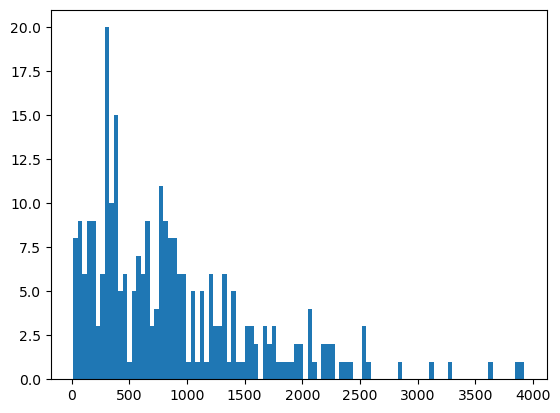

In [17]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from ragas.testset.persona import Persona

gennerator_llm = LangchainLLMWrapper(ChatOpenAI(model='gpt-4o-mini'))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [18]:
personas = [
    Persona(
        name="aspiring coach",
        role_description="A university student majoring in physical education who wants to become a weightlifting coach",
    ), # 체육교육을 전공하며 역도 지도자를 꿈꾸는 대학생

    Persona(
        name="high school athlete",
        role_description="A high school student training for national weightlifting competitions",
    ), # 전국 대회를 준비 중인 고등학생 역도 선수

    Persona(
        name="beginner lifter",
        role_description="Someone new to weightlifting looking for basic guidance on form and training routines",
    ), # 역도를 처음 시작하며 기본 자세와 훈련법을 찾는 초보자

    Persona(
        name="elite coach",
        role_description="A professional coach training elite or semi-professional weightlifters",
    ), # 엘리트 또는 준프로 선수를 지도하는 전문 코치

    Persona(
        name="rehab specialist",
        role_description="A rehabilitation therapist studying how weightlifting can aid physical recovery",
    ), # 역도를 재활 프로그램에 활용하려는 치료사

    Persona(
        name="sport scientist",
        role_description="A researcher interested in the biomechanics and physiology of weightlifting",
    ), # 역도의 생체역학과 생리학을 연구하는 스포츠 과학자

    Persona(
        name="youth coach",
        role_description="A coach focused on developing proper techniques in young weightlifters",
    ), # 청소년 선수의 올바른 기술 습득을 지도하는 코치

    Persona(
        name="strength trainer",
        role_description="A personal trainer using weightlifting to help clients build strength",
    ), # 역도를 통해 근력을 키워주는 퍼스널 트레이너

    Persona(
        name="PE teacher",
        role_description="A physical education teacher integrating weightlifting into school curriculum",
    ), # 학교 수업에 역도를 접목하려는 체육 교사

    Persona(
        name="female athlete",
        role_description="A female athlete looking for gender-specific guidance in weightlifting",
    ), # 여성 특화 역도 지도를 원하는 여성 선수

    Persona(
        name="injury-prone lifter",
        role_description="An athlete with a history of injuries seeking safe lifting practices",
    ), # 부상 경력이 있어 안전한 역도 기술을 찾는 운동선수

    Persona(
        name="fitness influencer",
        role_description="A content creator looking to produce accurate, educational weightlifting videos",
    ), # 정확하고 교육적인 역도 콘텐츠를 만들고자 하는 피트니스 인플루언서

    Persona(
        name="sports admin",
        role_description="A sports policy maker or administrator developing youth weightlifting programs",
    ), # 청소년 역도 프로그램을 기획하는 체육 행정가

    Persona(
        name="club manager",
        role_description="A local gym or weightlifting club manager seeking structured training programs",
    ), # 체계적인 훈련 프로그램을 찾는 지역 헬스장 혹은 역도 클럽 관리자

    Persona(
        name="talent scout",
        role_description="A scout identifying and nurturing young weightlifting talent",
    ), # 유망한 역도 선수를 발굴하고 육성하는 스카우트
]

In [ ]:
tmp_persona = personas[:3]
tmp_data = data['new_dataset'][3]

In [ ]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings

generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4o-mini"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

In [29]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs, testset_size=10)

Applying HeadlineSplitter:   0%|          | 0/32 [00:00<?, ?it/s]           unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to ap

In [33]:
dataset_df = dataset.to_pandas()

In [38]:
dataset_df

,user_input,reference_contexts,reference,synthesizer_name
0,일본이 한국 역도에 미친 영향은 무엇인가요?,[1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 각 학교에 부임해 온...,"일본은 1926년 이전 한국의 역도에 규깡과 아령, 철봉운동 등을 소개하며 영향을 ...",single_hop_specifc_query_synthesizer
1,남수일의 세계신기록 세운 연도는 언제인가요?,[1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 각 학교에 부임해 온...,남수일은 1938년 10월의 제3회 일본선수권대회에서 60㎏급 인상과 추상에서 31...,single_hop_specifc_query_synthesizer
2,1926년 이후 한국의 역도 발전은 어떻게 이루어졌나요?,[1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 각 학교에 부임해 온...,1926년 이후 우리나라 역도는 비록 일본 말을 그대로 따온 규정에서 비롯되었지만 ...,single_hop_specifc_query_synthesizer
3,바르셀로나 올림픽에서 한국 역도 선수의 성과는 어땠나요?,"[한국 역도의 황금기였다고 할 수 있는데, 이후 국제 스포 츠 정보에 민감하게 대응...",1992년 바르셀로나 올림픽경기대회에서 한국역도사상 처음으로 56㎏급의 전병관이 금...,single_hop_specifc_query_synthesizer
4,장미란 선수는 한국 역도 역사에서 어떤 중요한 성과를 이루었나요?,"[한국 역도의 황금기였다고 할 수 있는데, 이후 국제 스포 츠 정보에 민감하게 대응...",장미란 선수는 2008년 북경 올림픽에서 75kg급에서 금메달을 획득하여 한국 역도...,single_hop_specifc_query_synthesizer
5,김태현 선수는 1996년 애틀란타 올림픽에서 어떤 성적을 거두었나요?,"[한국 역도의 황금기였다고 할 수 있는데, 이후 국제 스포 츠 정보에 민감하게 대응...","김태현 선수는 1996년 애틀란타 올림픽에서 4위를 하였으나, 메달 획득에는 실패하...",single_hop_specifc_query_synthesizer
6,1988년 서울 올림픽 이후 한국 역도의 경기력이 어떻게 향상되었는가?,[<1-hop>\n\n1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 ...,"1988년 서울 올림픽 이후 한국 역도의 경기력은 차츰 향상되었으며, 1992년 바...",multi_hop_abstract_query_synthesizer
7,일본의 영향이 한국 역도에 미친 영향과 1988년 서울 올림픽 이후의 발전은 어떤 ...,[<1-hop>\n\n1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 ...,"일본의 영향은 한국 역도의 초기 발전에 중요한 역할을 했습니다. 1926년 이전, ...",multi_hop_abstract_query_synthesizer
8,What significant developments in Korean weight...,[<1-hop>\n\n1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 ...,"Leading up to the 1988 Seoul Olympics, Korean ...",multi_hop_abstract_query_synthesizer
9,"일본의 영향이 한국 역도에 미친 결과는 무엇이며, 1988년 서울 올림픽 이후 한국...",[<1-hop>\n\n1926년 이전의 우리나라 역도는 한일합방(1910년) 이후 ...,"일본의 영향은 한국 역도의 초기 발전에 큰 역할을 했습니다. 1926년 이전, 일본...",multi_hop_abstract_query_synthesizer


In [37]:
dataset_df.iloc[0, 2]

"일본은 1926년 이전 한국의 역도에 규깡과 아령, 철봉운동 등을 소개하며 영향을 미쳤습니다. 일본 체육회 체조학교를 졸업한 서상천은 한국에서 체육을 통해 힘을 기르는 것이 중요하다고 역설하며, 1926년 '조선체력 증진법 연구회'를 조직했습니다. 또한, 일본에서 열린 제1회 선수권대회에서 한국 선수들이 우승을 차지하는 등 일본의 영향 아래에서도 한국 역도가 발전하였습니다."